# Capstone 2 Project - Team Selection   

<img src="https://github.com/sunilayyaps/datascience/blob/master/capstone-project2/ipl/images/ipl_teams.png?raw=true">

## Problem Statement   

<div class="span25 alert alert-info"> 
IPL franchises spend massive amounts of money is ensuring that they have the best batting and bowling options according to their game plan. An important problem is to select the playing XI from the available options. 
<br>
</div>

## Solution

<div class="span25 alert alert-info"> 

The present work focuses on Machine learning based data analytics to provide a good approach to solve this problem. A detailed performance ranking scheme is developed based on Random Forests Extra Tree Classifier & PCA to rank the players with respect to the other players in fray in IPL 11.  <br>
<br>
The ranking scheme provides percentile scores to the players for their batting and bowling performance and enables them to be compared against each other. The sum of the percentile scores for batting and bowling for the players in a given selection of Playing XI provide the fitness function for measuring the suitability of the team. 

</div>

In [2]:
#Declaring all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy.stats as stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.stats.api as sms
from scipy import stats as st
import pandas.tseries
#To scale our features as with linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix
%matplotlib inline

import sklearn as sk
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import matplotlib.font_manager
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams

from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import sin, cos, sqrt, atan2
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from scipy.stats import probplot, shapiro
from statsmodels.graphics.regressionplots import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
sns.set()

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be remo

numpy version: 1.12.1
pandas version: 0.20.3
scikit-learn version: 0.19.1


Loading BokehJS ...

In [3]:
df_ipl = pd.read_excel('data/ipl_2018_players.xls',header=0)
df_ipl.head()

,team,player_id,player,role,price,prev-team,base-price,flag,rtm,foreign,...,balls,maiden,runs,wickets,bowl_avg,4wkt,best,economy,strike_rate,score
0,CSK,1,Faf du Plessis,Batsman,16000000,RPS,15000000,1,1,1,...,0.0,0,0,0,0.00,0,0,0.00,0.00,1
1,CSK,2,Harbhajan Singh,Bowler,20000000,MI,20000000,1,0,0,...,2919.0,5,3401,127,26.78,2,5/18,6.99,22.98,1
2,CSK,3,Dwayne Bravo,All-Rounder,64000000,GL,20000000,1,1,1,...,2017.0,1,2755,122,22.58,2,4/22,8.20,16.53,1
3,CSK,4,Shane Watson,All-Rounder,40000000,RCB,10000000,1,0,1,...,1837.0,3,2398,85,28.21,1,4/29,7.83,21.61,1
4,CSK,5,Kedar Jadhav,Batsman,78000000,DD,20000000,1,0,0,...,0.0,0,0,0,0.00,0,0,0.00,0.00,1


<div class="span25 alert alert-info"> 
This dataset contains all information of a player - the price in which they were bought, their batting and bowling averages, how many matches they have played and their role. 
</div>

In [4]:
for lab, row in df_ipl.iterrows() :
    df_ipl['price_increase'] = round(((df_ipl['price']-df_ipl['base-price'])/df_ipl['base-price'])*100,1)


In [5]:
#Creating individual DF for each teams
df_ipl_csk = df_ipl[df_ipl['team']=='CSK']
df_ipl_srh = df_ipl[df_ipl['team']=='SRH']
df_ipl_mi = df_ipl[df_ipl['team']=='MI']
df_ipl_rr = df_ipl[df_ipl['team']=='RR']
df_ipl_dd = df_ipl[df_ipl['team']=='DD']
df_ipl_kxip = df_ipl[df_ipl['team']=='KXIP']
df_ipl_rcb = df_ipl[df_ipl['team']=='RCB']
df_ipl_kkr = df_ipl[df_ipl['team']=='KKR']

<div class="span25 alert alert-info"> 
Deriving players for each team for exploratary analysis. 
</div>

In [6]:
df_ipl_csk_base = df_ipl_csk[df_ipl_csk['price']==df_ipl_csk['base-price']]
df_ipl_csk_base.head(5)

,team,player_id,player,role,price,prev-team,base-price,flag,rtm,foreign,...,maiden,runs,wickets,bowl_avg,4wkt,best,economy,strike_rate,score,price_increase
1,CSK,2,Harbhajan Singh,Bowler,20000000,MI,20000000,1,0,0,...,5,3401,127,26.78,2,5/18,6.99,22.98,1,0.0
6,CSK,7,Imran Tahir,Bowler,10000000,RPS,10000000,1,0,1,...,0,992,47,21.11,1,4/28,8.31,15.23,0,0.0
9,CSK,10,J Narayan,Wicket Keeper,2000000,NaN,2000000,1,0,0,...,0,0,0,0.00,0,0,0.00,0.00,0,0.0
10,CSK,11,Mitchell Santner,All-Rounder,5000000,NaN,5000000,1,0,1,...,0,591,28,21.10,1,4/11,7.10,17.80,0,0.0
13,CSK,14,Lungi Ngidi,Bowler,5000000,NaN,5000000,1,0,1,...,0,835,43,19.41,2,4/14,7.23,16.00,1,0.0


<div class="span25 alert alert-info"> 
Just a quick check on CSK players who were bought on the base price. 
</div>

In [7]:
df_ipl_price_sort = df_ipl.sort_values(by='price_increase',ascending=False)[:30]
writer = pd.ExcelWriter('df_ipl_top_per.xlsx')
df_ipl_price_sort.to_excel(writer,'Sheet1')
writer.save()

In [8]:
member = ((np.asarray(df_ipl_price_sort['player'])).reshape(6,5))
perchange = ((np.asarray(round(df_ipl_price_sort['price_increase'],0))).reshape(6,5))

<div class="span25 alert alert-info"> 
Sorting players as per the percentage increase from their base price to the price paid. 
</div>

In [9]:
df_ipl_sorted = pd.read_excel('data/df_ipl_top_per.xls',header=0)
result = df_ipl_sorted.pivot(index = 'Y',columns = 'X',values = 'price_increase')
print(result)

X       1       2       3      4      5
Y                                      
1  3000.0  1500.0  1166.7  850.0  700.0
2  2100.0  1450.0  1020.0  800.0  666.7
3  1900.0  1400.0  1000.0  800.0  620.0
4  1700.0  1400.0  1000.0  700.0  600.0
5  1600.0  1400.0   966.7  700.0  525.0
6  1600.0  1400.0   900.0  700.0  500.0


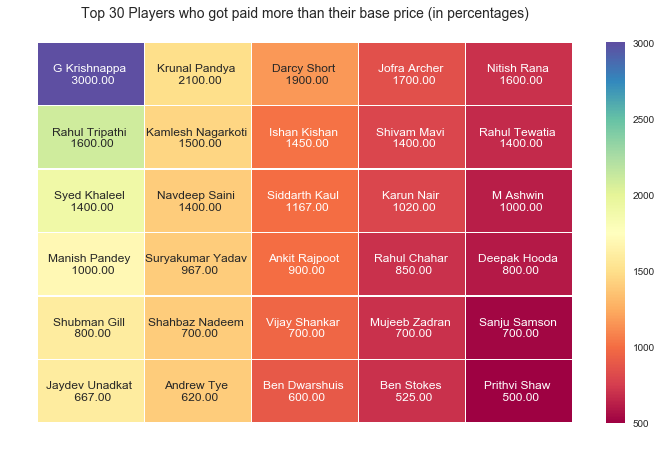

In [10]:
labels = (np.asarray(["{0} \n {1:.2f}".format(member,value)
                      for member,value in zip(member.flatten(),
                                            perchange.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(12,7))
title = 'Top 30 Players who got paid more than their base price (in percentages)'
plt.title(title,fontsize = 14)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='Spectral',linewidths=0.30,ax=ax)
plt.show()

In [11]:
df_ipl_foreign = df_ipl[df_ipl['country']!='IND']
df_ipl_indian = df_ipl[df_ipl['country']=='IND']
df_ipl_indian.loc[df_ipl_indian['price'].idxmax()]
df_ipl_foreign.loc[df_ipl_foreign['price'].idxmax()]

team                       RR
player_id                 125
player             Ben Stokes
role              All-Rounder
price               125000000
prev-team                 RPS
base-price           20000000
flag                        1
rtm                         0
foreign                     1
country                   ENG
retained                    0
innings                    11
not-out                     1
aggregrate                316
high-score               103*
average                  31.6
fifties                     1
hundreds                    1
ducks                       0
fours                      22
sixes                      15
balls_faced               221
scoring_rate           142.99
hard_hitter          0.167421
finisher            0.0909091
fast_scorer           1.42986
consistent               31.6
rbw                  0.624434
overs                      44
balls                     264
maiden                      1
runs                      316
wickets   

<div class="span25 alert alert-info"> 
Get a count of Indian players and Foreign national player in each team for exploratary analysis.
</div>

In [12]:
df_pivot = df_ipl.pivot_table('price',index='team',columns=['country'],aggfunc='count')
df_pivot_result = df_pivot.fillna(0)
df_pivot_result

country,AFG,AUS,BNG,ENG,IND,NP,NZ,SA,SL,WI
team,,,,,,,,,,
CSK,0.0,1.0,0.0,2.0,17.0,0.0,1.0,3.0,0.0,1.0
DD,0.0,2.0,0.0,1.0,17.0,1.0,2.0,2.0,0.0,0.0
KKR,0.0,3.0,0.0,0.0,12.0,0.0,0.0,1.0,0.0,3.0
KXIP,1.0,4.0,0.0,0.0,14.0,0.0,0.0,1.0,0.0,1.0
MI,0.0,2.0,1.0,0.0,17.0,0.0,0.0,2.0,1.0,2.0
RCB,0.0,1.0,0.0,2.0,16.0,0.0,3.0,2.0,0.0,0.0
RR,0.0,3.0,0.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0
SRH,2.0,2.0,1.0,1.0,17.0,0.0,1.0,0.0,0.0,1.0


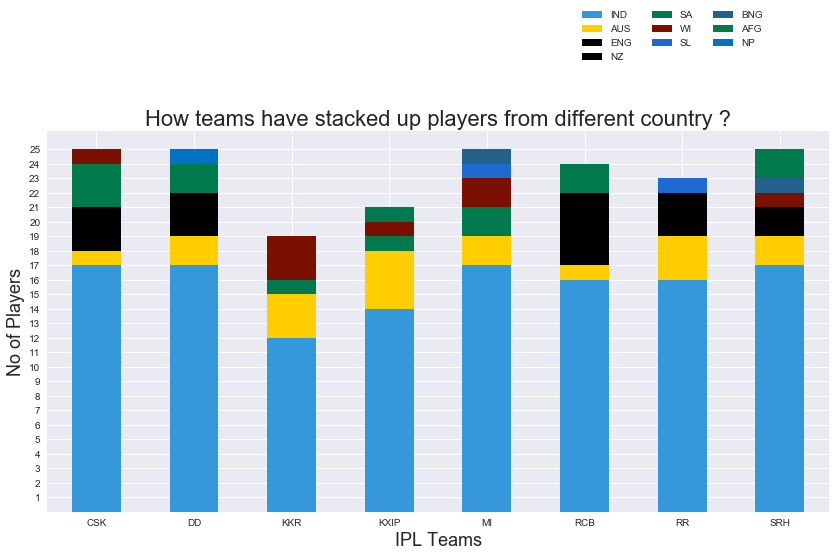

In [13]:
colors = ['#3498DB','#FFCD00','#000003','#000000','#007A4D','#7a1000','#1e6ad2','#21618C','#007A4D','#0072c6']

df_pivot_result.loc[:,['IND','AUS','ENG','NZ','SA', 'WI','SL','BNG','AFG', 'NP']].plot.bar(stacked=True, color=colors, figsize=(14,7))
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
tick_lab = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.title('How teams have stacked up players from different country ?',fontsize=22)
plt.xlabel('IPL Teams',fontsize=18)
plt.ylabel('No of Players',fontsize=18)
plt.legend(loc='center', bbox_to_anchor=(0.8, 1.25),
          ncol=3, fancybox=True, shadow=True)

<div class="span25 alert alert-info"> 
Since it is Indian Premier League it is obvious that you will see majority Indian players. Infact it is a mandatory rule that in you total team of 24-28, you can have only 8 foreign players which explains the graph above. In Foreign players, Australian players are more in each team. 
</div>

In [14]:
df_pivot_role = df_ipl.pivot_table('price',index='team',columns=['role'],aggfunc='count')
df_pivot_roles = df_pivot_role.fillna(0)
df_pivot_roles

role,All-Rounder,Batsman,Bowler,Wicket Keeper
team,,,,
CSK,8.0,6.0,9.0,2.0
DD,9.0,6.0,8.0,2.0
KKR,5.0,7.0,5.0,2.0
KXIP,5.0,9.0,7.0,0.0
MI,6.0,7.0,10.0,2.0
RCB,7.0,6.0,9.0,2.0
RR,10.0,4.0,7.0,2.0
SRH,7.0,7.0,9.0,2.0


<div class="span25 alert alert-info"> 
Exploring further on the composition of each team. <br>
1. A batsman is good at batting <br>
2. A bowler is specialized in bowling. <br>
3. An all-rounder does batting and bowling <br>
4. Wicket-keeper is a keeper who collects the ball behind the stumps. He is like a keeper in baseball who stands behind the pitcher. <br>
5. Wicket-keeper can be a good batsman also, but he cannot perform the role of a bowler.  <br>
</div>

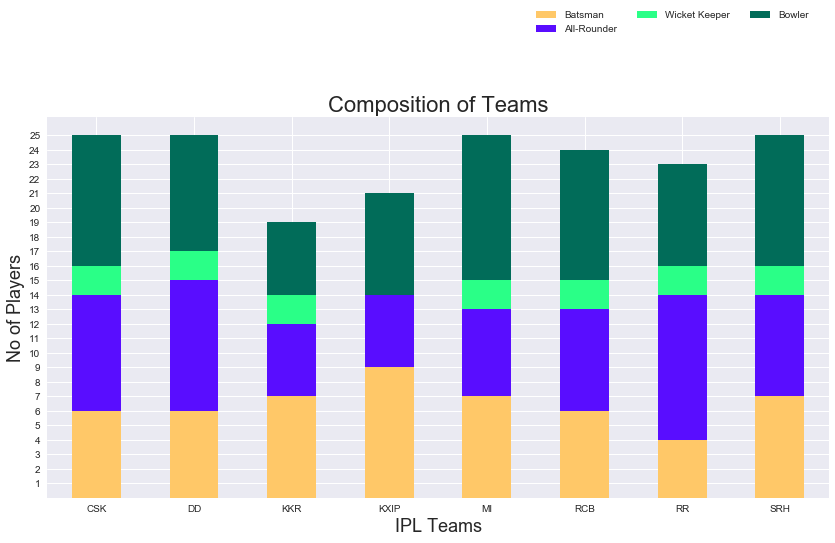

In [15]:
colors = ['#FFC868','#590DFF','#2AFF87','#016c59']
df_pivot_roles.loc[:,['Batsman','All-Rounder','Wicket Keeper','Bowler']].plot.bar(stacked=True, color=colors, figsize=(14,7))
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
tick_lab = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.title('Composition of Teams',fontsize=22)
plt.xlabel('IPL Teams',fontsize=18)
plt.ylabel('No of Players',fontsize=18)
plt.legend(loc='center', bbox_to_anchor=(0.8, 1.25),
          ncol=3, fancybox=True, shadow=True)

<div class="span25 alert alert-info"> 
Looking at the graph above, here are the observations <br> 

1. CSK, DD and RR are loaded up with lot of all-rounders. <br>
2. KKR who is historically a strong bowling team looks very weak in the bowling <br>
3. KXI doesn't have a specialized wicket keeper. I think K.L.Rahul who is a temporary keeper might do the job full time<br>
4. KKR only have 19 players. So if any of the players gets injured they don't have much to chose from.<br>
</div>

## Using Maching Learning to Select the Playing XI

In [16]:
df_ipl.shape

(187, 41)

In [17]:
#Create a dataframe for machine learning containing only id and other features
data_ipl_batsman = df_ipl[(df_ipl.flag==1)& (df_ipl.role=='Batsman') ]
data_ipl_bowler = df_ipl[(df_ipl.flag==1)& (df_ipl.role=='Bowler') ]
data_ipl_allrounder = df_ipl[(df_ipl.flag==1)& (df_ipl.role=='All-Rounder') ]
data_ipl_wicketkeeper = df_ipl[(df_ipl.flag==1)& (df_ipl.role=='Wicket Keeper') ]


<div class="span25 alert alert-warning"> 
Creating a dataframe to hold just players as per the role. This is needed as we are going to calculate the points as per the role. <br><br>

<b>A batsman will be scored as per the below parameters <br></b>
        - Hard Hitter =  (4*Fours + 6*Sixes) / Balls faced by player <br>
        - Finisher = Number of times not out/Total number of innings played <br>
        - FastScorer = Total runs scored/ Total balls faced<br>
        - Consistent = Total runs scored/ Total number of innings in which he got out<br>
        - Running between wickets = (Total runs scored - (4*Fours + 6*Sixes))/ Number of balls faced without boundary <br>
<b>A bowler will be scored as per the below parameters <br></b>
        - Economy= Total number of runs conceded / Total number of overs bowled <br>
        - WicketTaker= Total number of balls bowled / Total number of wickets taken <br>
        - Consistent = Total number of runs conceded / Total number of wickets taken <br>
<b>An allrounder will be calculated with both bowling and batting parameters<br></b>
<b>A wicket-keeper again will be calculated based on batting as each team does have only one or two keepers. So nothing more to select. <br></b>

</div>

In [18]:
print("Total number of batsman from all teams: ",len(data_ipl_batsman['player']))
print("Total number of bowler from all teams: ",len(data_ipl_bowler['player']))
print("Total number of All-rounder from all teams: ",len(data_ipl_allrounder['player']))

Total number of batsman from all teams:  47
Total number of bowler from all teams:  56
Total number of All-rounder from all teams:  49


In [19]:
#we are considering only 166 as rest of 21 players doesn't have much record. 
#We will now calculate weightage for our batsman. 
features = ['hard_hitter','consistent','finisher','fast_scorer','rbw','innings']
target = ['score']
X = data_ipl_batsman[features]
Y = data_ipl_batsman[target].values.ravel()

<div class="span25 alert alert-info"> 
Considering all the features needed for arrive on a score for batsman. I have added Innings also because there should be a weightage for the total number of Innings. Without this parameter a player like Pawan Deshpande  with only 11 matches became the top batsman of RCB which was correct. 
</div>

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [22]:
# calculating PCA weightage for each feature of a batsman.
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_train)
pca.explained_variance_ratio_

array([  8.11182196e-01,   1.72248290e-01,   1.65513632e-02,
         1.30691923e-05,   3.64119287e-06,   1.43972499e-06])

<div class="span25 alert alert-warning"> 
Weightage derived for each feature as per  Principal component analysis 
</div>


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
# load data
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
accuracy = accuracy_score(y_test_pred, Y_test)
print("The accuracy of this model is : ",accuracy)
print("The mean for this model is :", np.mean(y_test_pred == Y_test))

The accuracy of this model is :  0.733333333333
The mean for this model is : 0.733333333333


In [30]:
#print the feature importance from Random forest extra tree classifier
print(model.feature_importances_)

[ 0.12071418  0.27028862  0.18039084  0.09460007  0.16761101  0.16639527]


<div class="span25 alert alert-warning"> 
Weightage derived for each feature as per  RF Extra tree classifier. Let's summarize and present both the values in a table to compare the weightage.
</div>

| Features      | PCA weightage | RF ET  |
| ------------- |:-------------:| -----:|
| Hard Hitter   | 0.45713468 | 0.04511278 |
| Consistent    | 0.23259711 | 0.35151873|
| Finisher | 0.12284538      | 0.15014965|
| Fast Scorer | 0.10621777    | 0.12385979|
| RBW | 0.05603147     |0.18114865  |
| Innings | 0.02517359      | 0.14821039 |

<div class="span25 alert alert-danger"> 
PCA weighs Hard hitter more, where as RF Extra Tree classifier values consistentcy most. As a fanatic cricket fan and been the follower of a game for 20 years, I can say that RF ET has classified the features correctly and had derived correct weightage for each one.
</div>

In [31]:
#Lets apply the weightage to our data to derive a score for each player
data_ipl_batsman['player_score'] = 0
data_ipl_batsman['player_score'] = ( data_ipl_batsman['hard_hitter']*0.04511278 + data_ipl_batsman['consistent']*0.35151873 + data_ipl_batsman['finisher']*0.15014965 + data_ipl_batsman['fast_scorer']*0.12385979 + data_ipl_batsman['rbw']*0.18114865 + data_ipl_batsman['innings']*0.14821039 )

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<div class="span25 alert alert-info"> 
<b> Lets check couple of teams to see whether it derived correctly </b>
<div>

In [32]:
#checking RCB team top batsmen
rcb_batsmen = data_ipl_batsman[data_ipl_batsman.team == 'RCB']
top_rcb_batsman = rcb_batsmen.sort_values(['player_score'],ascending=[False])
top_rcb_batsman[['player','player_score']]

,player,player_score
182,Virat Kohli,34.379608
183,AB De Villiers,31.092563
103,Brendon McCullum,25.396713
115,Mandeep Singh,16.110974
110,Manan Vohra,14.973983
184,Sarfaraz Khan,12.564830


In [33]:
#checking CSK team top batsmen
csk_batsmen = data_ipl_batsman[data_ipl_batsman.team == 'CSK']
top_csk_batsman = csk_batsmen.sort_values(['player_score'],ascending=[False])
top_csk_batsman[['player','player_score']]

,player,player_score
170,SK Raina,35.576538
169,MS Dhoni,34.847452
16,Murali Vijay,24.371398
0,Faf du Plessis,17.691234
4,Kedar Jadhav,16.661134
17,Sam Billings,9.712707


<div class="span25 alert alert-info"> 
<b> Looking at the players above I can confirm that our RF-ET has derived the weightage correctly and has ranked the  top batsman perfectly. Lets do this for bowler and all-rounder and try to derive the playing 11. </b>
<div>

In [34]:
#Lets start adding weightage to bowlers features now
features = ['overs','bowl_avg','4wkt','economy','strike_rate']
target = ['score']
X = data_ipl_bowler[features]
Y = data_ipl_bowler[target].values.ravel()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
# load data
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
accuracy = accuracy_score(y_test_pred, Y_test)
print("The accuracy of this model is : ",accuracy)
print("The mean for this model is :", np.mean(y_test_pred == Y_test))

The accuracy of this model is :  0.647058823529
The mean for this model is : 0.647058823529


In [38]:
#print the feature importance from Random forest extra tree classifier
print(model.feature_importances_)

[ 0.29578184  0.16671518  0.13442321  0.22738662  0.17569315]


| Features      | RF-ET weightage | 
| ------------- |:-------------:| 
| Overs |0.27992605      | 
| Bowling Average  | 0.18260654 | 
| BigWicketTaker | 0.13540911      | 
| Economy | 0.13288325    | 
| Strike Rate |  0.26917505     |

<div class="span25 alert alert-info"> 
Again the weightage given by RF-ET looks reasonable. Total number of matches played, Strike Rate and Economy are of equal importance followed by bowling average and Big Wicket taking ability. It is not that often a player would take more than 4 wickets in a match so it is understandable that it is considered last. Let's apply this to the bowlers and apply both the scored to all-rounders.
</div>

In [39]:
data_ipl_bowler['player_score'] = ( data_ipl_bowler['bowl_avg']*0.18715724 + data_ipl_bowler['4wkt']*0.1051869 + data_ipl_bowler['economy']*0.21560828  + data_ipl_bowler['strike_rate']*0.20546656+ data_ipl_bowler['overs']*0.28658102  )

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
#checking RCB team top batsmen
rcb_bowler = data_ipl_bowler[data_ipl_bowler.team == 'RCB']
top_rcb_bowler = rcb_bowler.sort_values(['player_score'],ascending=[False])
top_rcb_bowler[['player','player_score']]

,player,player_score
108,Umesh Yadav,103.350254
109,Yuzvendra Chahal,66.219358
122,Tim Southee,47.255997
119,N Coulter-Nile,35.503099
114,M Ashwin,21.397661
112,Aniket Choudhary,16.112591
118,Mohammed Siraj,15.487631


<div class="span25 alert alert-info"> 
Y.Chahal coming down in 2nd place is little surprising considering the form he is in currently. But based on his IPL records, what is suggested above looks good. May be if we add his latest T20 international matches then it will reflect a better story. But rest of the ranking looks good.
</div>

In [41]:
#checking CSK team top bowler
csk_bowler = data_ipl_bowler[data_ipl_bowler.team == 'CSK']
top_csk_bowler = csk_bowler.sort_values(['player_score'],ascending=[False])
top_csk_bowler[['player','player_score']]

,player,player_score
1,Harbhajan Singh,150.815518
7,Karn Sharma,60.604087
6,Imran Tahir,43.137494
11,Deepak Chahar,41.821174
13,Lungi Ngidi,41.732200
18,Mark Wood,35.596556
20,Monu Singh,23.548088
8,Shardul Thakur,23.360911
12,Asif K M,6.343129


<div class="span25 alert alert-danger"> 
<b>A point to note all the player scores are related to their role. You cannot compare a bowler player score with batsman player score or even all-rounder player score.</b>
</div>

In [42]:
#Lets calculate all-rounder player score
data_ipl_allrounder['player_score'] = ( data_ipl_allrounder['hard_hitter']*0.04511278 + data_ipl_allrounder['consistent']*0.35151873 + data_ipl_allrounder['finisher']*0.15014965 + data_ipl_allrounder['fast_scorer']*0.12385979 + data_ipl_allrounder['rbw']*0.18114865 + data_ipl_allrounder['innings']*0.14821039 + data_ipl_allrounder['bowl_avg']*0.18715724 + data_ipl_allrounder['4wkt']*0.1051869 + data_ipl_allrounder['economy']*0.21560828  + data_ipl_allrounder['strike_rate']*0.20546656+ data_ipl_allrounder['overs']*0.28658102  )

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
#checking CSK team top all-rounder
rcb_allrounder = data_ipl_allrounder[data_ipl_allrounder.team == 'CSK']
top_csk_allrounder = rcb_allrounder.sort_values(['player_score'],ascending=[False])
top_csk_allrounder[['player','player_score']]

,player,player_score
171,R Jadeja,129.536858
2,Dwayne Bravo,126.603681
3,Shane Watson,124.994073
10,Mitchell Santner,41.796265
14,Kanishk Seth,28.732904
19,Kshitiz Sharma,21.738217
21,Chaitanya Bishnoi,19.709701
15,Dhruv Shorey,13.453623


### Wicket Keepers

In [48]:
data_ipl_wicketkeeper['player_score'] = 0
data_ipl_wicketkeeper['player_score'] = ( data_ipl_wicketkeeper['hard_hitter']*0.04511278 + data_ipl_wicketkeeper['consistent']*0.35151873 + data_ipl_wicketkeeper['finisher']*0.15014965 + data_ipl_wicketkeeper['fast_scorer']*0.12385979 + data_ipl_wicketkeeper['rbw']*0.18114865 + data_ipl_wicketkeeper['innings']*0.14821039 )
data_ipl_wicketkeeper[['player','team','player_score']]

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,player,team,player_score
5,Ambati Rayudu,CSK,25.695211
9,J Narayan,CSK,13.103871
42,Naman Ojha,DD,21.173063
46,Dinesh Karthik,KKR,29.023843
47,Robin Uthappa,KKR,31.854154
86,Ishan Kishan,MI,9.944343
97,Aditya Tare,MI,9.373755
107,Quinton de Kock,RCB,14.319454
121,Parthiv Patel,RCB,25.218968
127,Sanju Samson,RR,18.416056


<div class="span25 alert alert-info"> 
<b>For some of the teams wicketkeeper are easy choice. For example CSK obviously will got for MS Dhoni who ia also the captain of the side. Rishabh Pant from DD, W.Saha from SRH, Dinesh Karthik from DD are automatic choices.</b>
</div>

In [49]:
#lets concat all the dataframe and frame a final df
all_dfs = [data_ipl_allrounder, data_ipl_batsman, data_ipl_bowler,data_ipl_wicketkeeper]
df_final_teams = pd.concat(all_dfs)

In [50]:
df_csk = df_final_teams[df_final_teams["team"]=="CSK"]
df_csk_final = df_csk.sort_values(['role','player_score'],ascending=False)
df_csk_final[['player','role','player_score']]

,player,role,player_score
5,Ambati Rayudu,Wicket Keeper,25.695211
9,J Narayan,Wicket Keeper,13.103871
1,Harbhajan Singh,Bowler,150.815518
7,Karn Sharma,Bowler,60.604087
6,Imran Tahir,Bowler,43.137494
11,Deepak Chahar,Bowler,41.821174
13,Lungi Ngidi,Bowler,41.732200
18,Mark Wood,Bowler,35.596556
20,Monu Singh,Bowler,23.548088
8,Shardul Thakur,Bowler,23.360911


### Chennai Team obtained using Machine Learning

| Players      | Role | Score|
| ------------- |:-------------:| :-------------:| 
| SK Raina |Batsman      | 35.576538|
| MS Dhoni |Batsman/Wk      | 34.847452|
| M Vijay |Batsman      | 24.371398 |
| Faf du Plessis |Batsman      | 17.691234|
| Kedar Jadhav	 |Batsman      | 16.661134|
| Shane Watson |All-Rounder     | 124.994073|
| Dwayne Bravo |All-Rounder      | 126.603681|
| R Jadeja |All-Rounder        | 129.536858|
| Harbhajan Singh |Bowler      | 150.815518|
| Karn Sharma |Bowler      | 60.604087|
| Lungi Ngidi	 |Bowler      | 41.732200|
